In [80]:
# pip install scanpy squidpy cell2location[tutorials]

In [2]:
import pandas as pd
import scanpy as sc
import cell2location as c2l
import seaborn as sns
import matplotlib.pyplot as plt
# import spatial_utils as uti

/usr/local/lib/python3.11/dist-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/usr/local/lib/python3.11/dist-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
2025-04-29 15:55:06.431246: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745942106.865192      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745942106.977332      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [82]:
import squidpy as sq

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [9]:
metadata= pd.read_csv('metadata.csv', index_col=0)

In [5]:
adata_st = uti.load_manual_visium_data('filtered_count_matrix/', metadata=metadata)
adata_st= uti.load_manual_spatial_data(adata_st)

NameError: name 'uti' is not defined

In [3]:
adata_st = sc.read_h5ad('adata_st.h5ad')

In [4]:
adata_st

AnnData object with n_obs × n_vars = 4895 × 28402
    obs: 'nCount_RNA', 'nFeature_RNA', 'patientid', 'subtype', 'Classification', 'in_tissue', 'array_row', 'array_col', 'pxl_col_in_fullres', 'pxl_row_in_fullres'
    var: 'gene_ids', 'gene_names', 'feature_types'
    uns: 'Classification_colors', 'spatial'
    obsm: 'spatial'

In [5]:
missing_gene_ids = adata_st.var[
    adata_st.var['gene_ids'].isna() | (adata_st.var['gene_ids'].astype(str).str.strip() == '')
]
print(missing_gene_ids)


      gene_ids   gene_names    feature_types
2679       NaN       TBCE.1  Gene Expression
4757       NaN  LINC01238.1  Gene Expression
5239       NaN   CYB561D2.1  Gene Expression
8239       NaN      MATR3.1  Gene Expression
13811      NaN     HSPA14.1  Gene Expression
19475      NaN    GOLGA8M.1  Gene Expression
26996      NaN       GGT1.1  Gene Expression
28032      NaN    TMSB15B.1  Gene Expression


/tmp/ipykernel_31/3995226835.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_st,color='Classification')


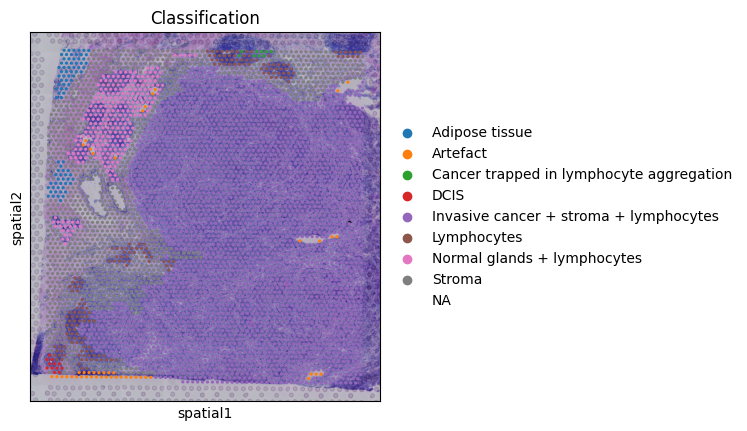

In [6]:
sc.pl.spatial(adata_st,color='Classification')

In [7]:
!ls /kaggle/input/honda/single_cell/

Allcells_raw_count_out.zip  features.tsv.gz  scadata.h5ad
barcodes.tsv.gz		    matrix.mtx.gz    Whole_miniatlas_meta.csv


In [8]:
adata_sc= sc.read_10x_mtx('/kaggle/input/honda/single_cell')

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_31/1966438843.py", line 1, in <cell line: 0>
    adata_sc= sc.read_10x_mtx('/kaggle/input/honda/single_cell')
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/legacy_api_wrap/__init__.py", line 82, in fn_compatible
    return fn(*args_all, **kw)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scanpy/readwrite.py", line 585, in read_10x_mtx
    adata = _read_10x_mtx(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scanpy/readwrite.py", line 612, in _read_10x_mtx
    adata = read(
            ^^^^^
  File "/usr/local/lib/python3.11/dist-packages/legacy_api_wrap/__init__.py", line 82, in fn_compatible
    return fn(*args_all, **kw)
           ^^^^^^^^^^^^

TypeError: object of type 'NoneType' has no len()

In [34]:
meta= pd.read_csv('/kaggle/input/honda/single_cell/Whole_miniatlas_meta.csv', sep=',')
meta.drop(axis = 0, index= 0, inplace=True)
meta.set_index('NAME', inplace =True)
adata_sc.obs = meta

/tmp/ipykernel_31/3918471840.py:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta= pd.read_csv('/kaggle/input/honda/single_cell/Whole_miniatlas_meta.csv', sep=',')


In [35]:
umap =pd.read_csv('Whole_miniatlas_umap.coords.tsv',sep='\t', header=0)
umap.drop(axis = 0, index= 0, inplace=True)
umap.set_index('NAME', inplace = True)
umap = umap.astype(float)

In [36]:
adata_sc.obsm['X_umap'] = umap.to_numpy()

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


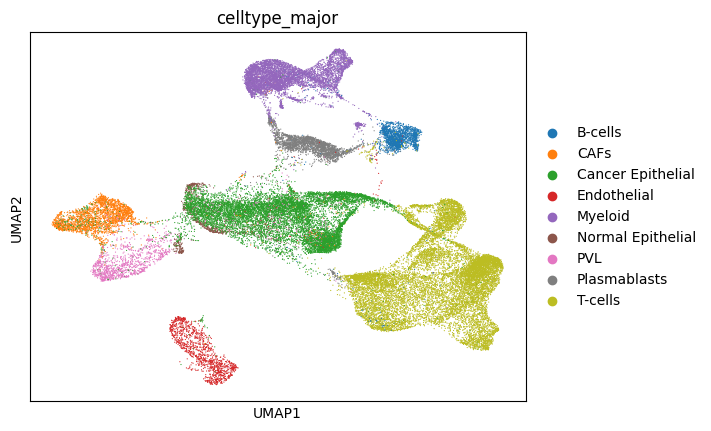

In [185]:
sc.pl.umap(adata_sc[adata_sc.obs['subtype'] == 'TNBC'], color='celltype_major')

In [189]:
(adata_sc.obs['celltype_major']).value_counts()

celltype_major
T-cells              14456
Cancer Epithelial    10836
Myeloid               6422
Plasmablasts          2667
CAFs                  2551
B-cells               1976
Endothelial           1383
PVL                   1264
Normal Epithelial      957
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


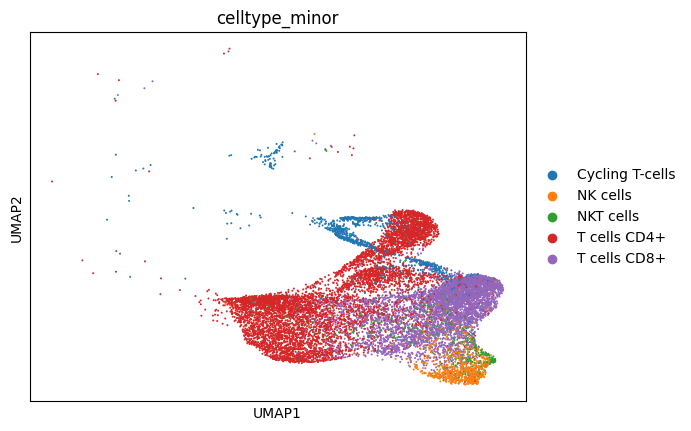

In [190]:
sc.pl.umap(adata_sc[adata_sc.obs['subtype'] == 'TNBC'][adata_sc.obs['celltype_major'] == 'T-cells'], color='celltype_minor')

In [40]:
adata_sc[adata_sc.obs['subtype'] == 'TNBC'].obs

Patient Percent_mito nCount_RNA nFeature_RNA  \
NAME                                                                       
CID44041_AAAGTAGTCCTAGGGC  CID44041  4.065311563       3001         1338   
CID44041_AACACGTCAACACCTA  CID44041  5.382242029       2917         1154   
CID44041_AACTTTCTCCTACAGA  CID44041  2.096177559       4866         1782   
CID44041_AAGGCAGTCATTGCGA  CID44041  3.273932864       4826         1658   
CID44041_AAGGTTCGTTGTCGCG  CID44041  4.515929477       3233         1269   
...                             ...          ...        ...          ...   
CID3963_GCATGCGGTTCGAATC    CID3963  0.437317784       1372          575   
CID3963_GTACGTAGTGAGGGAG    CID3963  14.87526948       3247         1167   
CID3963_TATTACCTCTTACCTA    CID3963  15.22422638       6043         1712   
CID3963_TTCTCCTTCCACGACG    CID3963  17.94598436       2814         1029   
CID3963_GCGAGAATCAAACGGG    CID3963  5.767138194       4595         1543   

                              celltype_major       celltype_minor  \
NAME                                                                
CID44041_AAAGTAGTCCTAGGGC        Endothelial    Endothelial ACKR1   
CID44041_AACACGTCAACACCTA        Endothelial    Endothelial ACKR1   
CID44041_AACTTTCTCCTACAGA        Endothelial    Endothelial ACKR1   
CID44041_AAGGCAGTCATTGCGA        Endothelial    Endothelial ACKR1   
CID44041_AAGGTTCGTTGTCGCG        Endothelial    Endothelial ACKR1   
...                                      ...                  ...   
CID3963_GCATGCGGTTCGAATC   Cancer Epithelial       Cancer LumA SC   
CID3963_GTACGTAGTGAGGGAG   Cancer Epithelial       Cancer LumA SC   
CID3963_TATTACCTCTTACCTA   Cancer Epithelial       Cancer Her2 SC   
CID3963_TTCTCCTTCCACGACG   Cancer Epithelial       Cancer Her2 SC   
CID3963_GCGAGAATCAAACGGG   Normal Epithelial  Luminal Progenitors   

                               celltype_subset subtype     gene_module  \
NAME                                                                     
CID44041_AAAGTAGTCCTAGGGC    Endothelial ACKR1    TNBC  no_gene_module   
CID44041_AACACGTCAACACCTA    Endothelial ACKR1    TNBC  no_gene_module   
CID44041_AACTTTCTCCTACAGA    Endothelial ACKR1    TNBC  no_gene_module   
CID44041_AAGGCAGTCATTGCGA    Endothelial ACKR1    TNBC  no_gene_module   
CID44041_AAGGTTCGTTGTCGCG    Endothelial ACKR1    TNBC  no_gene_module   
...                                        ...     ...             ...   
CID3963_GCATGCGGTTCGAATC        Cancer LumA SC    TNBC               2   
CID3963_GTACGTAGTGAGGGAG        Cancer LumA SC    TNBC               3   
CID3963_TATTACCTCTTACCTA        Cancer Her2 SC    TNBC               1   
CID3963_TTCTCCTTCCACGACG        Cancer Her2 SC    TNBC               1   
CID3963_GCGAGAATCAAACGGG   Luminal Progenitors    TNBC  no_gene_module   

                                     Calls  normal_cell_call     CNA_value  
NAME                                                                        
CID44041_AAAGTAGTCCTAGGGC  no_scTYPER_call  no_inferCNV_call  no_CNA_value  
CID44041_AACACGTCAACACCTA  no_scTYPER_call  no_inferCNV_call  no_CNA_value  
CID44041_AACTTTCTCCTACAGA  no_scTYPER_call  no_inferCNV_call  no_CNA_value  
CID44041_AAGGCAGTCATTGCGA  no_scTYPER_call  no_inferCNV_call  no_CNA_value  
CID44041_AAGGTTCGTTGTCGCG  no_scTYPER_call  no_inferCNV_call  no_CNA_value  
...                                    ...               ...           ...  
CID3963_GCATGCGGTTCGAATC           LumA_SC            cancer   0.231542891  
CID3963_GTACGTAGTGAGGGAG           LumA_SC            cancer   0.298488317  
CID3963_TATTACCTCTTACCTA           Her2_SC            cancer   0.228002684  
CID3963_TTCTCCTTCCACGACG           Her2_SC            cancer   0.392383032  
CID3963_GCGAGAATCAAACGGG   no_scTYPER_call            normal   0.193586889  

[42512 rows x 12 columns]

In [41]:
adata_sc.obs.head()

Patient Percent_mito nCount_RNA nFeature_RNA  \
NAME                                                                     
CID3586_AAGACCTCAGCATGAG  CID3586  1.506221349       4581         1689   
CID3586_AAGGTTCGTAGTACCT  CID3586  5.793742758       1726          779   
CID3586_ACCAGTAGTTGTGGCC  CID3586  1.383238405       1229          514   
CID3586_ACCCACTAGATGTCGG  CID3586  1.923076923       1352          609   
CID3586_ACTGATGGTCAACTGT  CID3586  13.32554062       1711          807   

                         celltype_major     celltype_minor    celltype_subset  \
NAME                                                                            
CID3586_AAGACCTCAGCATGAG    Endothelial  Endothelial ACKR1  Endothelial ACKR1   
CID3586_AAGGTTCGTAGTACCT    Endothelial  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACCAGTAGTTGTGGCC    Endothelial  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACCCACTAGATGTCGG    Endothelial  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACTGATGGTCAACTGT    Endothelial  Endothelial ACKR1  Endothelial ACKR1   

                         subtype     gene_module            Calls  \
NAME                                                                
CID3586_AAGACCTCAGCATGAG   HER2+  no_gene_module  no_scTYPER_call   
CID3586_AAGGTTCGTAGTACCT   HER2+  no_gene_module  no_scTYPER_call   
CID3586_ACCAGTAGTTGTGGCC   HER2+  no_gene_module  no_scTYPER_call   
CID3586_ACCCACTAGATGTCGG   HER2+  no_gene_module  no_scTYPER_call   
CID3586_ACTGATGGTCAACTGT   HER2+  no_gene_module  no_scTYPER_call   

                          normal_cell_call     CNA_value  
NAME                                                      
CID3586_AAGACCTCAGCATGAG  no_inferCNV_call  no_CNA_value  
CID3586_AAGGTTCGTAGTACCT  no_inferCNV_call  no_CNA_value  
CID3586_ACCAGTAGTTGTGGCC  no_inferCNV_call  no_CNA_value  
CID3586_ACCCACTAGATGTCGG  no_inferCNV_call  no_CNA_value  
CID3586_ACTGATGGTCAACTGT  no_inferCNV_call  no_CNA_value

In [42]:
celltype= 'celltype_major'


df = adata_sc.obs[['subtype', celltype]].copy()
grouped = df.groupby(['subtype', celltype]).size().reset_index(name='count')
normalized = grouped.copy()
normalized['percent'] = normalized.groupby('subtype')['count'].transform(lambda x: 100 * x / x.sum())

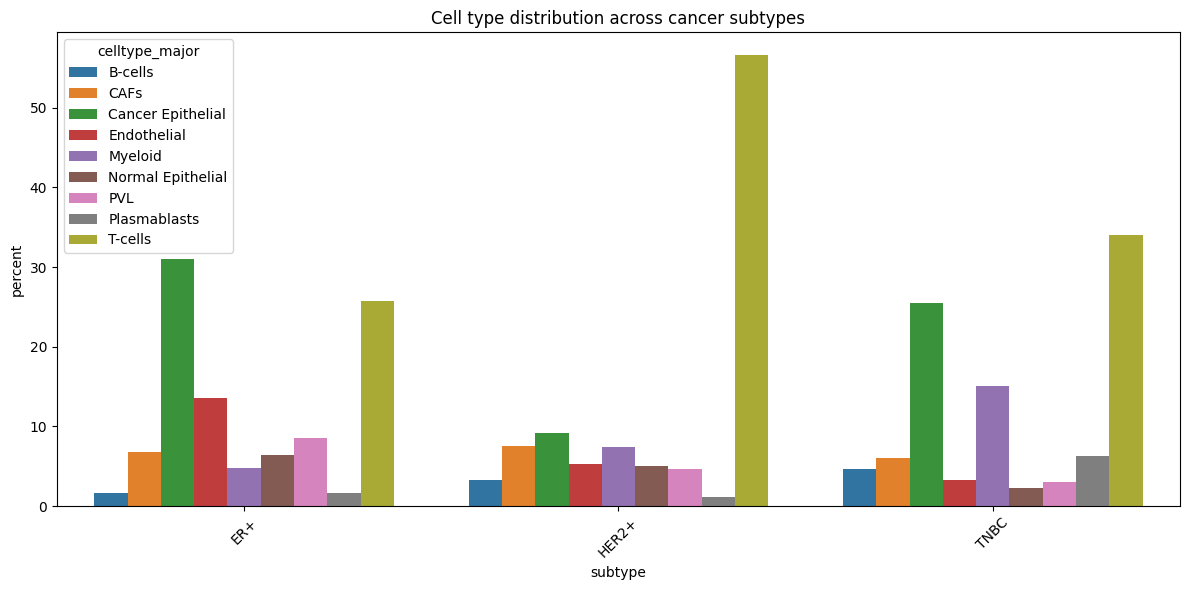

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(data=normalized, x='subtype', y='percent', hue=celltype)

plt.xticks(rotation=45)
plt.title('Cell type distribution across cancer subtypes')
plt.tight_layout()
plt.show()


In [44]:
adata_sc= adata_sc[adata_sc.obs['subtype']=="TNBC"]

In [45]:
import gc 
gc.collect()

163

In [176]:
adata_st.var["MT_gene"] = adata_st.var['gene_names'].str.startswith("MT-")
adata_st.var['MT_gene'].value_counts()

MT_gene
False    28389
True        13
Name: count, dtype: int64

In [177]:
adata_st.obsm["MT"] = adata_st[:, adata_st.var["MT_gene"].values].X.toarray()
adata_st = adata_st[:, ~adata_st.var["MT_gene"].values]

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


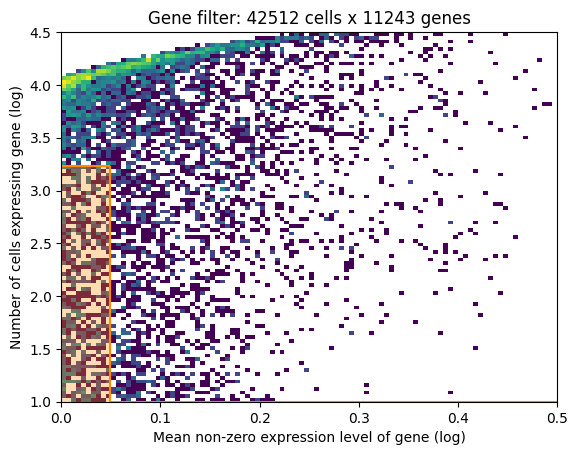

In [178]:
selected  = c2l.utils.filtering.filter_genes(adata_sc, cell_count_cutoff=10, cell_percentage_cutoff2=0.04, nonz_mean_cutoff=1.12)
# selected = c2l.utils.filtering.filter_genes(adata_sc, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)

In [179]:
# getting the shared gene sympol from each 
stfeature = adata_st.var
selected = pd.merge(stfeature, pd.DataFrame(selected),  left_on = 'gene_names', right_on = 0, how ='inner')
adata_sc = adata_sc[:, selected['gene_names']].copy()
adata_sc.var.rename(columns={'gene_ids': 'gene_names'}, inplace=True)
adata_sc.var = adata_sc.var.merge(selected[['gene_ids', 'gene_names','MT_gene']], on='gene_names', how='left')
adata_sc = adata_sc[:, ~adata_sc.var['gene_ids'].isna().copy()]
adata_sc.var.set_index('gene_ids',inplace= True)

/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py:6191: ImplicitModificationWarning: Trying to modify index of attribute `.var` of view, initializing view as actual.
  frame.index = index
/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [180]:
adata_st = adata_st[:, ~adata_st.var['gene_ids'].isna().copy()]

In [181]:
adata_st.var.set_index('gene_ids',inplace= True)
adata_st.var_names_make_unique()

/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py:6191: ImplicitModificationWarning: Trying to modify index of attribute `.var` of view, initializing view as actual.
  frame.index = index
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:835: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['ENSG00000238009', 'ENSG00000239945', 'ENSG00000241860', 'ENSG00000286448', 'ENSG00000236601']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [182]:
shared_features = [
    feature for feature in adata_st.var_names if feature in adata_sc.var_names
]
adata_st = adata_st[:, shared_features].copy()

In [15]:
adata_sc.layers["counts"] = adata_sc.X

In [ ]:
# adding the raw data to the adata_sc
import pandas as pd
from anndata import AnnData
from scipy.io import mmread
import scipy.sparse
matrix = mmread('Wu_etal_2021_BRCA_scRNASeq/count_matrix_sparse.mtx').tocsr()
matrix = matrix.T
print(matrix.shape)  

genes = pd.read_csv('Wu_etal_2021_BRCA_scRNASeq/count_matrix_genes.tsv', header=None, sep='\t')
barcodes = pd.read_csv('Wu_etal_2021_BRCA_scRNASeq/count_matrix_barcodes.tsv', header=None)
adata = AnnData(X=matrix)
adata.var_names = genes[0]  # or genes[0], depending on which column is gene symbol
adata.obs_names = barcodes[0]
data = adata[adata_sc.obs_names, adata_sc.var['gene_names']]
adata_sc.layers["raw_counts"] = data.X.copy()

In [6]:
adata_sc = sc.read_h5ad('adata_sc.h5ad')

In [7]:
adata_st = sc.read_h5ad('adata_st.h5ad')

In [10]:
adata_sc

AnnData object with n_obs × n_vars = 42512 × 10390
    obs: 'Patient', 'Percent_mito', 'nCount_RNA', 'nFeature_RNA', 'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype', 'gene_module', 'Calls', 'normal_cell_call', 'CNA_value', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'gene_names', 'feature_types', 'n_cells', 'nonz_mean', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_umap'
    layers: 'counts', 'raw_counts'

In [11]:
c2l.models.RegressionModel.setup_anndata(
    adata=adata_sc,
    batch_key="Patient",
    labels_key="celltype_major",
    layer = 'raw_counts')

/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


In [12]:
model = c2l.models.RegressionModel(adata_sc)
# default, try on GPU:
# use_gpu = True
model.train(max_epochs=250, batch_size=2500, train_size=1, lr=0.002, accelerator="gpu")

INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/configuration_validator.py:68: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training:   0%|          | 0/250 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=250` reached.


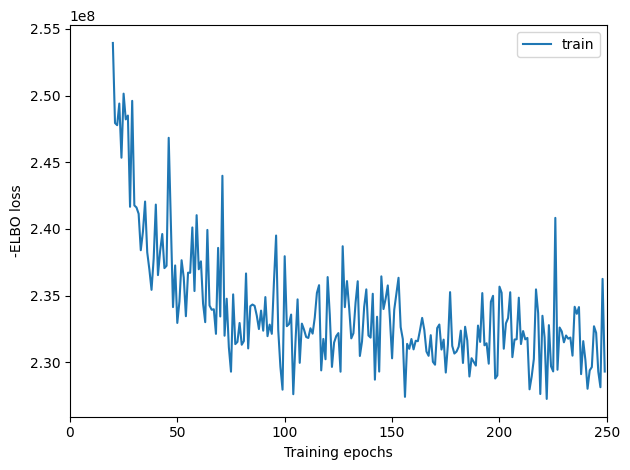

In [13]:
model.plot_history(20)

## from the plot, we actually inspect that the loss curve is decreasing and leveling off. This indicates that the model converged.

In [24]:
model.export_posterior(
    adata_sc,
    sample_kwargs={"num_samples": 1000, "batch_size": 2500, "accelerator": 'gpu'},
)

INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


Sampling local variables, batch:   0%|          | 0/18 [00:00<?, ?it/s]

Sampling global variables, sample:   0%|          | 0/999 [00:00<?, ?it/s]

AnnData object with n_obs × n_vars = 42512 × 10390
    obs: 'Patient', 'Percent_mito', 'nCount_RNA', 'nFeature_RNA', 'celltype_major', 'celltype_minor', 'celltype_subset', 'subtype', 'gene_module', 'Calls', 'normal_cell_call', 'CNA_value', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'gene_names', 'feature_types', 'n_cells', 'nonz_mean', 'MT_gene'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod'
    obsm: 'X_umap'
    varm: 'means_per_cluster_mu_fg', 'stds_per_cluster_mu_fg', 'q05_per_cluster_mu_fg', 'q95_per_cluster_mu_fg'
    layers: 'counts', 'raw_counts'

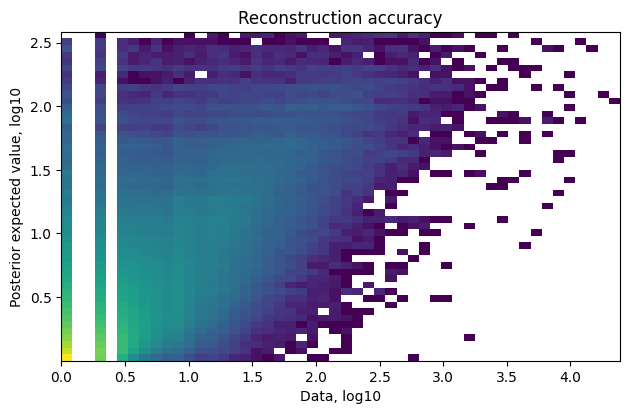

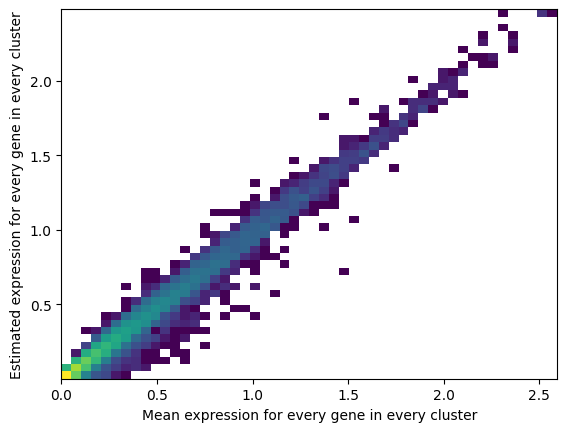

In [25]:
model.plot_QC()

## the reconstruction accuracy plot should have a noisy diagonal line which is nromal due to high complexity of sc data meaning it estimated the expression of each gene is not that good 
## while in the estimated expression signatures it shows a good diagonal line which indicate the model was able to estimate accurate expression profiles for the inferred cell types (cell clusters)

In [26]:
# export estimated expression in each cluster
if "means_per_cluster_mu_fg" in adata_sc.varm.keys():
    inf_aver = adata_sc.varm["means_per_cluster_mu_fg"][
        [f"means_per_cluster_mu_fg_{i}" for i in adata_sc.uns["mod"]["factor_names"]]
    ].copy()
else:
    inf_aver = adata_sc.var[
        [f"means_per_cluster_mu_fg_{i}" for i in adata_sc.uns["mod"]["factor_names"]]
    ].copy()

inf_aver.columns = adata_sc.uns["mod"]["factor_names"]
inf_aver.head()

B-cells      CAFs  Cancer Epithelial  Endothelial   Myeloid  \
gene_ids                                                                        
ENSG00000188976  0.106351  0.193450           0.896163     0.178948  0.115732   
ENSG00000188290  0.002982  0.414652           1.639065     0.507762  0.195806   
ENSG00000187608  0.402605  3.434988           1.151523     2.471304  3.990028   
ENSG00000188157  0.001865  0.086654           0.352046     0.322591  0.052128   
ENSG00000131591  0.001136  0.015705           0.111967     0.012775  0.017408   

                 Normal Epithelial       PVL  Plasmablasts   T-cells  
gene_ids                                                              
ENSG00000188976           0.477980  0.123606      0.103235  0.073463  
ENSG00000188290           0.855089  1.011919      0.005628  0.005047  
ENSG00000187608           0.309289  2.460151      0.384671  0.727766  
ENSG00000188157           0.215362  0.219704      0.001195  0.001209  
ENSG00000131591           0.047102  0.013212      0.002109  0.006295

In [66]:
c2l.models.Cell2location.setup_anndata(
    adata=adata_st,
)

/usr/local/lib/python3.11/dist-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)


Cell2location requires two user-provided hyperparameters (N_cells_per_location and detection_alpha).

N_cells_per_location describes the expected cell abundance in each location or spot. This can usually be obtained through paired histology images. We will use N_cells_per_location=8 in this tutorial.

detection_alpha handles the technical variability in RNA detection sensitivity within the slide/batch. The technical variability in RNA detection sensitivity can also be extracted based on histological examination. For more information we refer the analyst to the documentation of cell2location. The default value is detection_alpha=20.

https://github.com/BayraktarLab/cell2location/blob/master/docs/images/Note_on_selecting_hyperparameters.pdf


In [43]:
inf_aver

B-cells      CAFs  Cancer Epithelial  Endothelial   Myeloid  \
gene_ids                                                                        
ENSG00000188976  0.106351  0.193450           0.896163     0.178948  0.115732   
ENSG00000188290  0.002982  0.414652           1.639065     0.507762  0.195806   
ENSG00000187608  0.402605  3.434988           1.151523     2.471304  3.990028   
ENSG00000188157  0.001865  0.086654           0.352046     0.322591  0.052128   
ENSG00000131591  0.001136  0.015705           0.111967     0.012775  0.017408   
...                   ...       ...                ...          ...       ...   
ENSG00000185973  0.012188  0.041999           0.111953     0.027058  0.059897   
ENSG00000124333  0.032419  0.117386           0.228941     0.174338  0.122857   
ENSG00000124334  0.001107  0.000528           0.000483     0.001295  0.000160   
ENSG00000277856  0.059314  0.003168           0.001405     0.001434  0.000334   
ENSG00000275063  0.010272  0.000715           0.000200     0.001038  0.000180   

                 Normal Epithelial       PVL  Plasmablasts   T-cells  
gene_ids                                                              
ENSG00000188976           0.477980  0.123606      0.103235  0.073463  
ENSG00000188290           0.855089  1.011919      0.005628  0.005047  
ENSG00000187608           0.309289  2.460151      0.384671  0.727766  
ENSG00000188157           0.215362  0.219704      0.001195  0.001209  
ENSG00000131591           0.047102  0.013212      0.002109  0.006295  
...                            ...       ...           ...       ...  
ENSG00000185973           0.077437  0.038197      0.014367  0.011436  
ENSG00000124333           0.138410  0.090907      0.048606  0.052103  
ENSG00000124334           0.001378  0.001099      0.000837  0.024783  
ENSG00000277856           0.002186  0.003195     13.070151  0.000231  
ENSG00000275063           0.002422  0.001679      3.158986  0.000469  

[10390 rows x 9 columns]

In [58]:
adata_st.var_names = adata_st.var_names.astype(str)
inf_aver.index = inf_aver.index.astype(str)
common_genes = adata_st.var_names.intersection(inf_aver.index)
adata_st = adata_st[:, common_genes].copy()
inf_aver = inf_aver.loc[common_genes]

In [67]:
model = c2l.models.Cell2location(
    adata_st,
    cell_state_df=inf_aver,
    N_cells_per_location=5,
)
model.view_anndata_setup()

Anndata setup with scvi-tools version 1.3.0.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 4895  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 10390 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/configuration_validator.py:68: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/traine

Training:   0%|          | 0/30000 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=30000` reached.


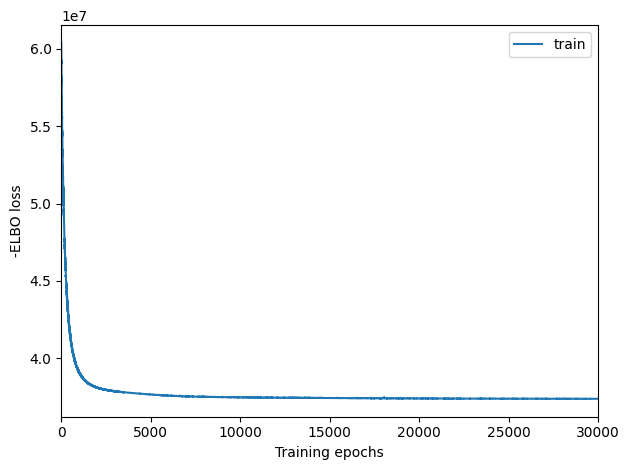

In [69]:
model.train(max_epochs=30000, batch_size=None, train_size=1, accelerator = 'gpu')
# plot training history
model.plot_history()

## here we can see that the training history is leveling off and the model converged. The model now can estimate the cell type in each spot 

In [70]:
adata_st = model.export_posterior(
    adata_st,
    sample_kwargs={
        "num_samples": 1000,
        "batch_size": model.adata.n_obs,
        "accelerator": 'gpu',
    },
)

INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


Sampling local variables, batch:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling global variables, sample:   0%|          | 0/999 [00:00<?, ?it/s]

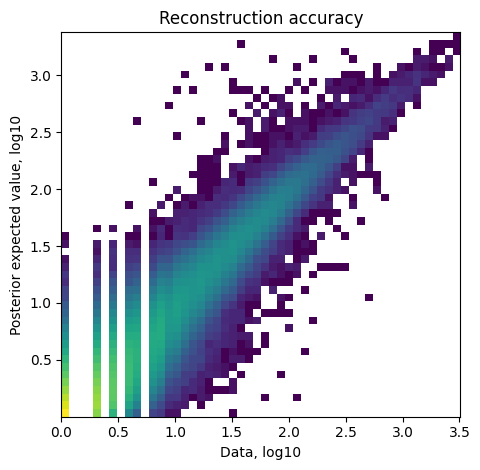

In [71]:
model.plot_QC()

## As we can see the reconstruction accuracy roughly shows a diagonal, so we can continue with the analysis and inspecting the results.

In [72]:
adata_st.obs[adata_st.uns["mod"]["factor_names"]] = adata_st.obsm[
    "q05_cell_abundance_w_sf"
]

/tmp/ipykernel_31/2176177742.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_st,


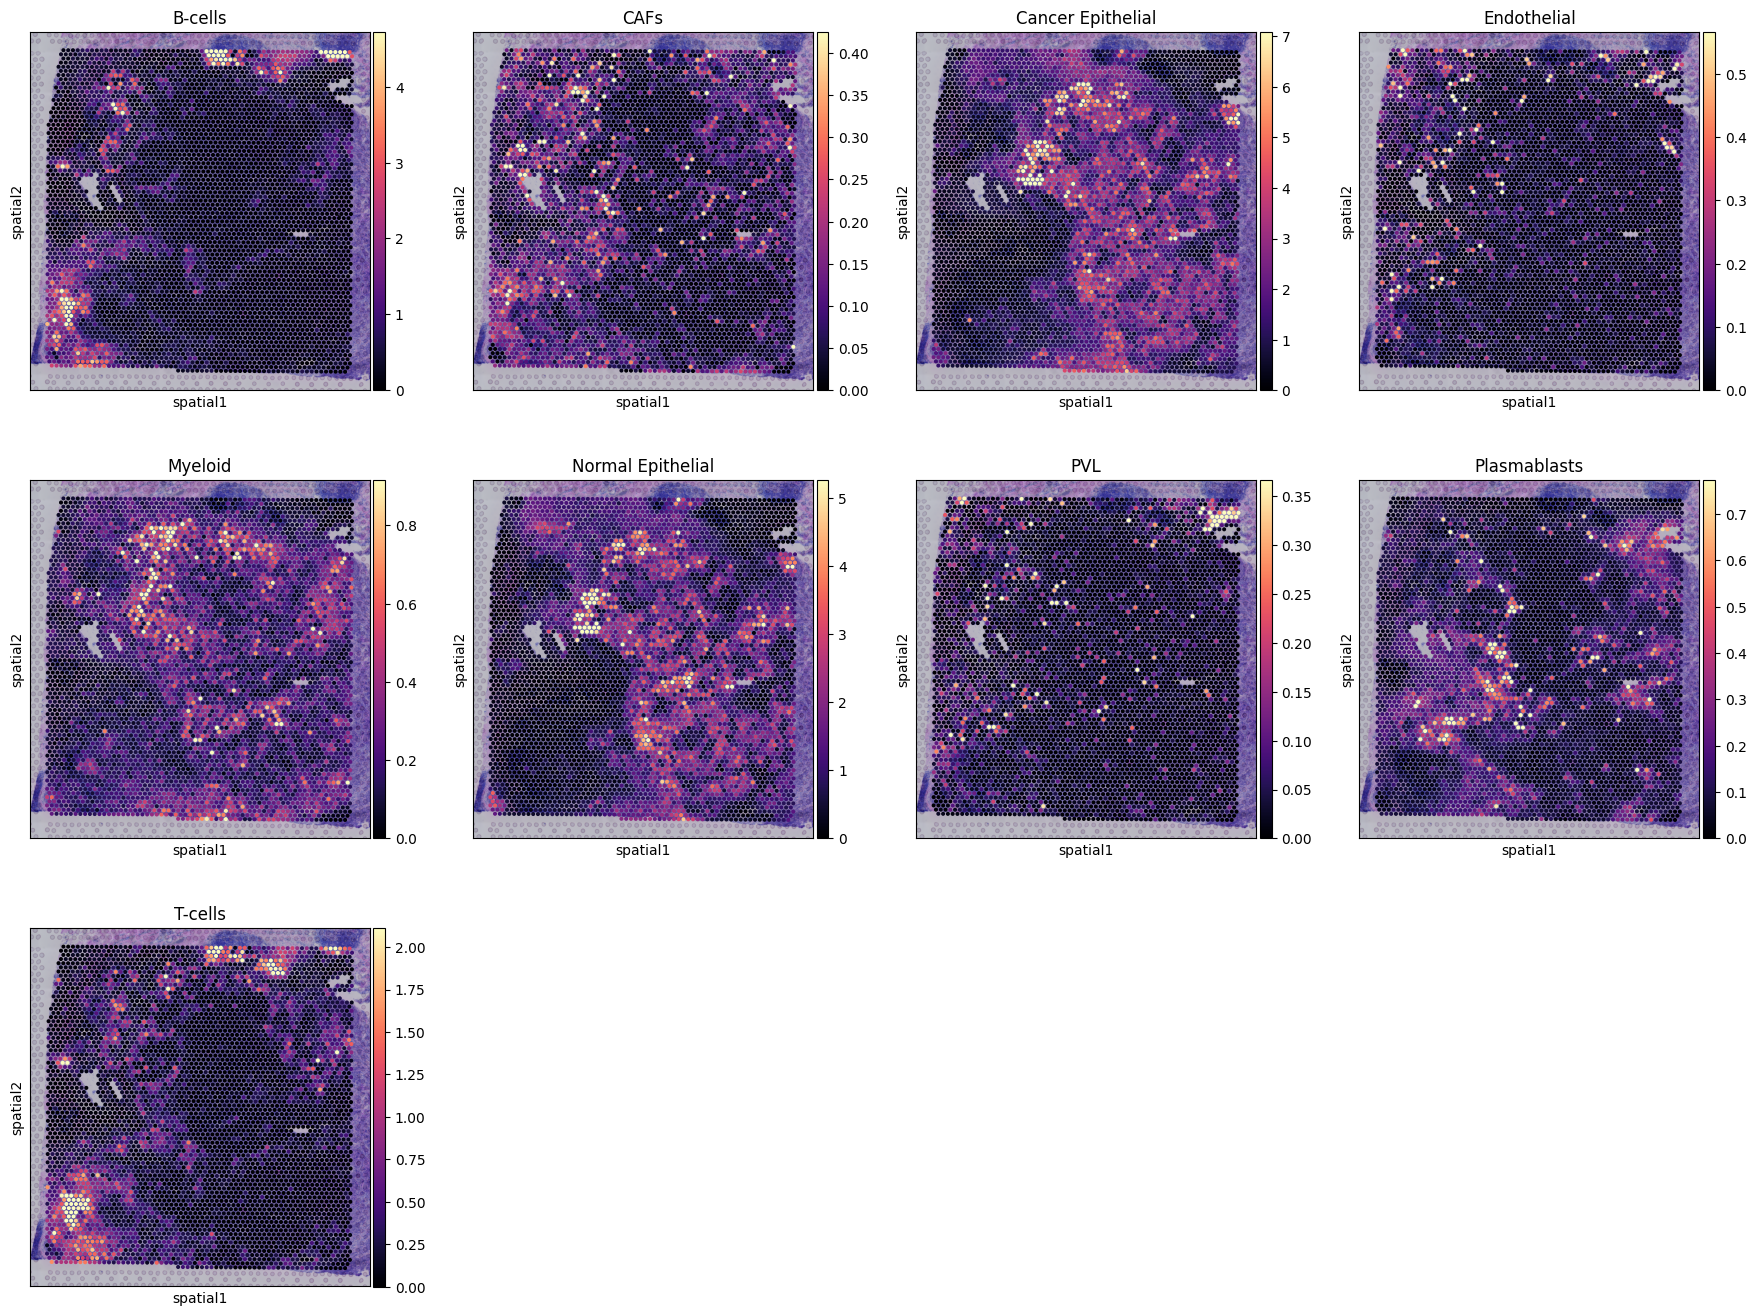

In [81]:
with plt.rc_context({"figure.figsize": [4.5, 5]}):
    sc.pl.spatial(adata_st,
        cmap="magma",
        color=adata_st.uns["mod"]["factor_names"],
        ncols=4,
        size=1.3,
        img_key="hires",
        # limit color scale at 99.2% quantile of cell abundance
        vmin=0,
        vmax="p99.2",
    )

In [ ]:
adata_st.obs.to_csv('decon_metadata.csv', header= True, index= True)

In [84]:
adata_st.write('decon_adata_st.h5ad')

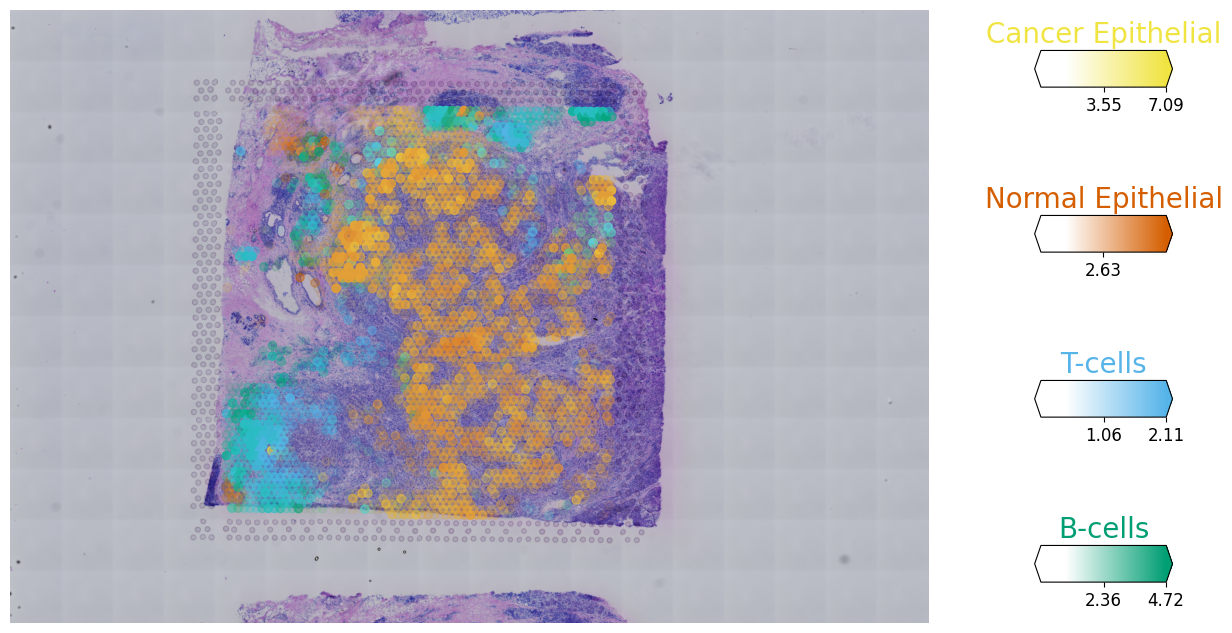

In [86]:
clust_col = ["Cancer Epithelial", "Normal Epithelial", "T-cells", "B-cells"]
clust_labels = clust_col

with plt.rc_context({"figure.figsize": (15, 15)}):
    fig = c2l.plt.plot_spatial(
        adata=adata_st,
        color=clust_col,
        labels=clust_labels,
        max_color_quantile=0.992,
        circle_diameter=6,
        show_img=True,
        colorbar_position="right",
        colorbar_shape={"horizontal_gaps": 0.2},
    )

/tmp/ipykernel_31/2122553207.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_st, color = 'Classification')


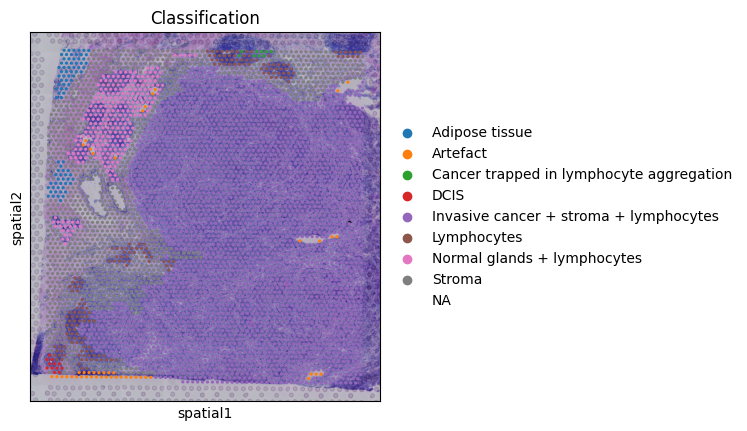

In [88]:
sc.pl.spatial(adata_st, color = 'Classification')